# Modelo definitivo Educación Continua GP Pipeline

## Tabla de contenidos
    1. Carga librerías y base de datos
    2. Manejo de bases de datos
    3. Construcción modelo definitivo
    4. Plan piloto

## 1. Carga librerías y base de datos

In [ ]:
%pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.1 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import datetime as dt
import unidecode
from pytrends.request import TrendReq
import math
from datetime import datetime
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

#plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Manejo de bases de datos

### 2.1 Carga la fuente de datos

In [ ]:
# se carga la fuente de datos
path = '/content/drive/MyDrive/Colab Notebooks/Training ML/Proyecto Edco/EstructuraBaseTest-gp.csv'
data = pd.read_csv(path, delimiter=';', encoding='utf-8')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Consectutivo_curso        1158 non-null   object 
 1   Nombre                    1158 non-null   object 
 2   Fecha_inicio              1158 non-null   object 
 3   Fecha_creación            1158 non-null   object 
 4   Curso_nuevo               1158 non-null   object 
 5   Programa                  1158 non-null   object 
 6   NumCursos                 1158 non-null   int64  
 7   NumCursosFac              1158 non-null   int64  
 8   Keywords                  1158 non-null   object 
 9   Valor_por_hora            1158 non-null   float64
 10  Categoría                 1158 non-null   object 
 11  Facultad                  1158 non-null   object 
 12  Modalidad                 1158 non-null   object 
 13  Estado                    1158 non-null   object 
 14  Valor_Ta

In [ ]:
data


,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,...,Estado,Valor_Tarifa,Departamento,Estado.1,Punto_equilibrio,Meta,Cupomaximo,Inscritos,Cantidadinscritostotales,validaExitoso
0,CUR-0003273,Curso Competencias Transversales en la Educaci...,28/06/2016,1/04/2016,Si,No,24,1,"Procesos de educación, cursos de educación, te...",71428.57,...,Finalizado,500000.0,Educación,Finalizado,18.0,40.0,50.0,16.0,16,0
1,CUR-0003291,Tercer campamento de verano - las Tecnologías ...,20/06/2016,1/04/2016,Si,Si,24,7,"Cursos en ingeniería, como ser lider en ingeni...",16547.62,...,Finalizado,1390000.0,Ingeniería Sistemas,Finalizado,21.0,22.0,40.0,33.0,33,1
2,CUR-0003295,Curso de Investigación en Salud y Epidemiología,4/08/2016,1/06/2016,Si,No,58,2,"Cursos presenciales medicina, medicina interna...",82192.31,...,Finalizado,2137000.0,Medicina,Finalizado,12.0,20.0,70.0,18.0,18,1
3,CUR-0003295,Curso de Investigación en Salud y Epidemiología,4/08/2016,1/06/2016,Si,No,58,2,"Cursos presenciales medicina, medicina interna...",11538.46,...,Finalizado,300000.0,Medicina,Finalizado,12.0,20.0,70.0,18.0,18,1
4,CUR-0003305,Curso Buenas Prácticas en Modalidad Blended pa...,7/06/2016,1/04/2016,Si,No,24,1,"Procesos de educación, cursos de educación, te...",50000.00,...,Finalizado,1200000.0,Educación,Finalizado,13.0,40.0,50.0,9.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,CUR-0038448,Diseño de cosméticos naturales,5/09/2022,1/07/2022,Si,No,197,3,"Diseño, comesticos, innovación, química, cosmé...",58333.33,...,Finalizado,1400000.0,Química,Finalizado,11.0,20.0,35.0,34.0,34,1
1154,CUR-0038453,Historia antigua de Japón,3/09/2022,1/07/2022,No,No,197,2,"Historia antigua de Japón, cursos de historia,...",45000.00,...,Finalizado,405000.0,Centro del Japón,Finalizado,7.0,15.0,15.0,7.0,7,1
1155,CUR-0038454,Actualidad del derecho disciplinario,29/08/2022,1/06/2022,Si,No,158,15,"Derecho, abogado disciplinario, derecho discip...",78000.00,...,Finalizado,1560000.0,Derecho,Finalizado,13.0,20.0,22.0,17.0,17,1
1156,CUR-0038896,Neurociencias y regulación emocional en el ámb...,1/09/2022,1/07/2022,Si,No,197,1,"Neurociencias, educación, regulación emocional...",29333.33,...,Finalizado,1320000.0,Educación,Finalizado,13.0,20.0,22.0,20.0,20,1


### 2.2 copia de los datos a un nuevo dataframe

In [ ]:
data_modelo = pd.DataFrame(data.loc[:, ['Consectutivo_curso','Nombre','Fecha_inicio','Fecha_creación','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords','Valor_por_hora','Categoría','Facultad','Modalidad','validaExitoso']])

In [ ]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso
0,CUR-0003273,Curso Competencias Transversales en la Educaci...,28/06/2016,1/04/2016,Si,No,24,1,"Procesos de educación, cursos de educación, te...",71428.57,Actualización Profesional,EDUCACION,Presencial,0
1,CUR-0003291,Tercer campamento de verano - las Tecnologías ...,20/06/2016,1/04/2016,Si,Si,24,7,"Cursos en ingeniería, como ser lider en ingeni...",16547.62,Niños y Jóvenes,INGENIERIA,Presencial,1
2,CUR-0003295,Curso de Investigación en Salud y Epidemiología,4/08/2016,1/06/2016,Si,No,58,2,"Cursos presenciales medicina, medicina interna...",82192.31,Actualización Profesional,MEDICINA,Presencial,1
3,CUR-0003295,Curso de Investigación en Salud y Epidemiología,4/08/2016,1/06/2016,Si,No,58,2,"Cursos presenciales medicina, medicina interna...",11538.46,Actualización Profesional,MEDICINA,Presencial,1
4,CUR-0003305,Curso Buenas Prácticas en Modalidad Blended pa...,7/06/2016,1/04/2016,Si,No,24,1,"Procesos de educación, cursos de educación, te...",50000.00,Actualización Profesional,EDUCACION,Presencial,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,CUR-0038448,Diseño de cosméticos naturales,5/09/2022,1/07/2022,Si,No,197,3,"Diseño, comesticos, innovación, química, cosmé...",58333.33,Actualización Profesional,CIENCIAS,Virtual,1
1154,CUR-0038453,Historia antigua de Japón,3/09/2022,1/07/2022,No,No,197,2,"Historia antigua de Japón, cursos de historia,...",45000.00,"Arte, Ciencias y Humanidades",DIRECCION DE INTERNACIONALIZACION,Virtual,1
1155,CUR-0038454,Actualidad del derecho disciplinario,29/08/2022,1/06/2022,Si,No,158,15,"Derecho, abogado disciplinario, derecho discip...",78000.00,Actualización Profesional,DERECHO,Virtual,1
1156,CUR-0038896,Neurociencias y regulación emocional en el ámb...,1/09/2022,1/07/2022,Si,No,197,1,"Neurociencias, educación, regulación emocional...",29333.33,Actualización Profesional,EDUCACION,Virtual,1


### 2.3 trasnfromacion de variables y manejo de null

In [ ]:
# # Transformaciones a variables de la base 
data_modelo['Curso_nuevo'] = data_modelo['Curso_nuevo'].replace({'Si':1, 'No':0})
data_modelo['Programa'] = data_modelo['Programa'].replace({'Si':1, 'No':0})

In [ ]:
# Transformar formato de las fechas  
data_modelo['Fecha_creación'] =  pd.to_datetime(data_modelo['Fecha_creación'], format='%d/%m/%Y')
data_modelo['Fecha_inicio']   =  pd.to_datetime(data_modelo['Fecha_inicio']  , format='%d/%m/%Y')

In [ ]:
#Agregar ventanas de tiempo
data_modelo['Fecha_busqueda'] =  data_modelo['Fecha_creación'] + pd.Timedelta('-1 days')
data_modelo['Fecha_ventana']  =  data_modelo['Fecha_creación'] + pd.Timedelta('-180 days')


In [ ]:
# Variables a imputar con media

In [ ]:
data_modelo['Valor_por_hora'].mean()

59805.07943005182

In [ ]:
data_modelo['Valor_por_hora']=data_modelo['Valor_por_hora'].fillna(data_modelo['Valor_por_hora'].mean())

In [ ]:
data_modelo['Keywords']=data_modelo['Keywords'].fillna('n/a')

In [ ]:
#Separación de keywords
#data_modelo = data_modelo.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
#data_modelo = data_modelo.withColumn('Keywords', F.split(F.col('Keywords'), ','))
#data_modelo = data_modelo.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [ ]:
import re
# meta lenguaje 

In [ ]:
print (data_modelo.iloc[2])

Consectutivo_curso                                          CUR-0003295
Nombre                  Curso de Investigación en Salud y Epidemiología
Fecha_inicio                                        2016-08-04 00:00:00
Fecha_creación                                      2016-06-01 00:00:00
Curso_nuevo                                                           1
Programa                                                              0
NumCursos                                                            58
NumCursosFac                                                          2
Keywords              Cursos presenciales medicina, medicina interna...
Valor_por_hora                                                 82192.31
Categoría                                     Actualización Profesional
Facultad                                                       MEDICINA
Modalidad                                                    Presencial
validaExitoso                                                   

In [ ]:
print (data_modelo.Consectutivo_curso.iloc[2])

CUR-0003295


In [ ]:
print (data_modelo.Keywords.iloc[2])

Cursos presenciales medicina, medicina interna, diplomado en medicina, diplomados presenciales en medicina, oferta cursos medicina


In [ ]:
data_modelo.Keywords =   data_modelo.Keywords.str.replace(r',\s', ',', regex=True )


In [ ]:
print (data_modelo.Keywords.iloc[2])

Cursos presenciales medicina,medicina interna,diplomado en medicina,diplomados presenciales en medicina,oferta cursos medicina


In [ ]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']] = data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [ ]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana
0,CUR-0003273,Curso Competencias Transversales en la Educaci...,2016-06-28,2016-04-01,1,0,24,1,"Procesos de educación,cursos de educación,tecn...",71428.57,Actualización Profesional,EDUCACION,Presencial,0,2016-03-31,2015-10-04
1,CUR-0003291,Tercer campamento de verano - las Tecnologías ...,2016-06-20,2016-04-01,1,1,24,7,"Cursos en ingeniería,como ser lider en ingenie...",16547.62,Niños y Jóvenes,INGENIERIA,Presencial,1,2016-03-31,2015-10-04
2,CUR-0003295,Curso de Investigación en Salud y Epidemiología,2016-08-04,2016-06-01,1,0,58,2,"Cursos presenciales medicina,medicina interna,...",82192.31,Actualización Profesional,MEDICINA,Presencial,1,2016-05-31,2015-12-04
3,CUR-0003295,Curso de Investigación en Salud y Epidemiología,2016-08-04,2016-06-01,1,0,58,2,"Cursos presenciales medicina,medicina interna,...",11538.46,Actualización Profesional,MEDICINA,Presencial,1,2016-05-31,2015-12-04
4,CUR-0003305,Curso Buenas Prácticas en Modalidad Blended pa...,2016-06-07,2016-04-01,1,0,24,1,"Procesos de educación,cursos de educación,tecn...",50000.00,Actualización Profesional,EDUCACION,Presencial,0,2016-03-31,2015-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,CUR-0038448,Diseño de cosméticos naturales,2022-09-05,2022-07-01,1,0,197,3,"Diseño,comesticos,innovación,química,cosmético...",58333.33,Actualización Profesional,CIENCIAS,Virtual,1,2022-06-30,2022-01-02
1154,CUR-0038453,Historia antigua de Japón,2022-09-03,2022-07-01,0,0,197,2,"Historia antigua de Japón,cursos de historia,h...",45000.00,"Arte, Ciencias y Humanidades",DIRECCION DE INTERNACIONALIZACION,Virtual,1,2022-06-30,2022-01-02
1155,CUR-0038454,Actualidad del derecho disciplinario,2022-08-29,2022-06-01,1,0,158,15,"Derecho,abogado disciplinario,derecho discipli...",78000.00,Actualización Profesional,DERECHO,Virtual,1,2022-05-31,2021-12-03
1156,CUR-0038896,Neurociencias y regulación emocional en el ámb...,2022-09-01,2022-07-01,1,0,197,1,"Neurociencias,educación,regulación emocional,á...",29333.33,Actualización Profesional,EDUCACION,Virtual,1,2022-06-30,2022-01-02


In [ ]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consectutivo_curso  1158 non-null   object        
 1   Nombre              1158 non-null   object        
 2   Fecha_inicio        1158 non-null   datetime64[ns]
 3   Fecha_creación      1158 non-null   datetime64[ns]
 4   Curso_nuevo         1158 non-null   category      
 5   Programa            1158 non-null   category      
 6   NumCursos           1158 non-null   int64         
 7   NumCursosFac        1158 non-null   int64         
 8   Keywords            1158 non-null   object        
 9   Valor_por_hora      1158 non-null   float64       
 10  Categoría           1158 non-null   category      
 11  Facultad            1158 non-null   category      
 12  Modalidad           1158 non-null   category      
 13  validaExitoso       1158 non-null   int64       

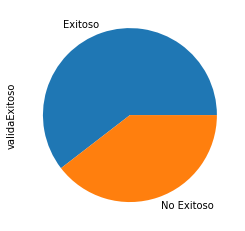

In [ ]:
# visaulizamos  el % de cuross exitos y no exitos 
data_modelo['validaExitoso'].value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'}).plot.pie()

In [ ]:

# imprimme  el % de cuross exitos y no exitos 
data.validaExitoso.value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'})

Exitoso       0.604491
No Exitoso    0.395509
Name: validaExitoso, dtype: float64

In [ ]:
import seaborn as sns # Libraría interesante para hacer visualizaciones

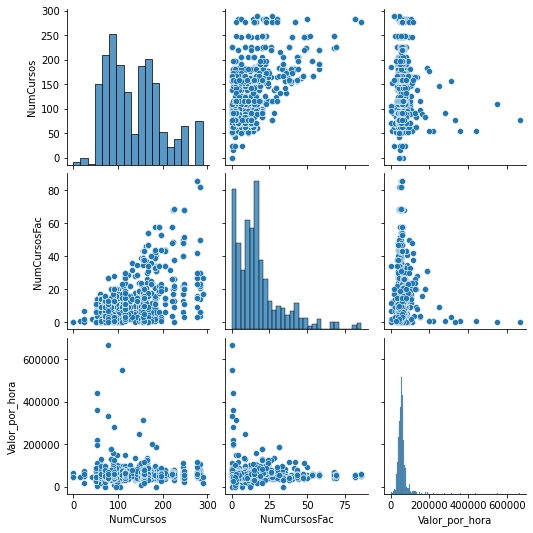

In [ ]:
# visualizamos la correlación de las variables tipo numerico 
sns.pairplot(data_modelo.loc[:, ['NumCursos','NumCursosFac','Valor_por_hora']])

In [ ]:
data_modelo.select_dtypes(include=['float64', 'int']).columns

Index(['NumCursos', 'NumCursosFac', 'Valor_por_hora', 'validaExitoso'], dtype='object')

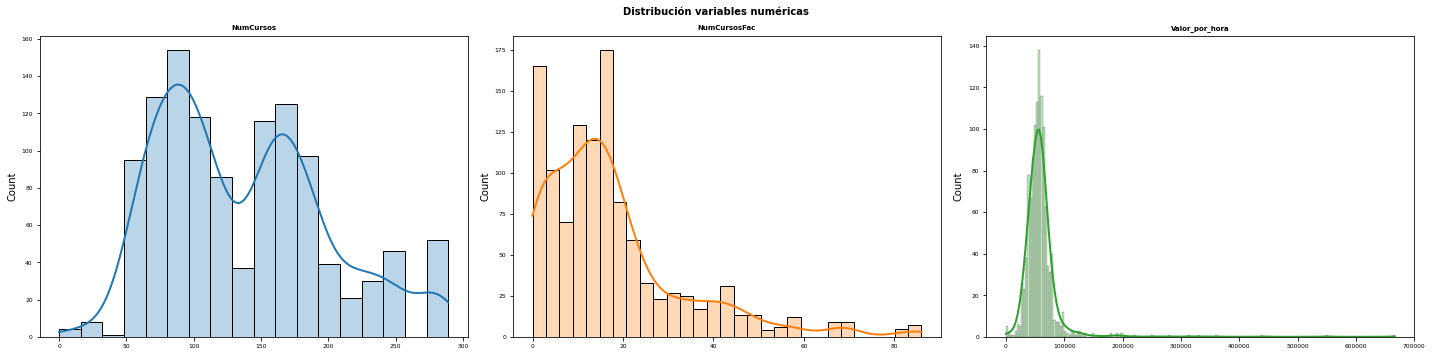

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.flat
columnas_numeric = data_modelo.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('validaExitoso')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data_modelo,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## 3 funcion  Google Trends

In [ ]:
#Completar información con pytrens - Google Trends
def get_google_trend(keywords, start_date, end_date):
  start_date_str = start_date.strftime('%Y-%m-%d')
  end_date_str = end_date.strftime('%Y-%m-%d')
  keywords_list = list(keywords)
  keywords_list = [kw.lower().strip().replace(r'[^\w\s]', '') for kw in keywords_list]
  print('Fecja inicio:',start_date_str,' Fecha Fin:',end_date_str , ' Keywords:',keywords_list) 
  df = None
  max_tol = 30
  init_tol = 1
  pytrend = TrendReq(hl='su', tz=360, geo='CO')


  # pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25),geo='CO' , proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})

  #pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25),geo='CO' ,  retries=2, backoff_factor=0.1, requests_args={'verify':False})

  # pytrend = TrendReq()
  try:
  
    pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
    df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
  
    
  except:
  
    request_success = False
    while (not request_success) and (init_tol < max_tol):
      time.sleep(1+round(random.random(), 2))
      try:
    
        pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
        df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
      
        request_success = True
      except Exception as e:
        print(e)
        request_success = False
        init_tol = init_tol + 1


  if df is None:
    return 0
  means = df.mean()
  return round(float(means.mean()), 2)



In [ ]:
#Completar información con pytrens - Google Trends
def get_google_trend(keywords, start_date, end_date):
  start_date_str = start_date.strftime('%Y-%m-%d')
  end_date_str = end_date.strftime('%Y-%m-%d')
  keywords_list = list(keywords)
  keywords_list = [kw.lower().strip().replace(r'[^\w\s]', '') for kw in keywords_list]
  #print('Fecja inicio:',start_date_str,' Fecha Fin:',end_date_str , ' Keywords:',keywords_list) 
  df = None
  max_tol = 30
  init_tol = 1
  pytrend = TrendReq(hl='su', tz=360, geo='CO')


  # pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25),geo='CO' , proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})

  #pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25),geo='CO' ,  retries=2, backoff_factor=0.1, requests_args={'verify':False})

  # pytrend = TrendReq()
  try:
  
    pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
    df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
    #print(df)
    means = df.mean()
    #print(df.mean())
    #print(means.mean())
    print('Fecja inicio:',start_date_str,' Fecha Fin:',end_date_str , ' Keywords:',keywords_list , 'media: ',means.mean()) 
    return round(float(means.mean()), 2)
    
  except Exception as e:
     print('Error:',e)
     return 0
  

### 3.1 Busqueda kerword

In [ ]:
%pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=06e35b7b529bea3cfb3ecdc1c6c46df44af0df12a72ae8d3831e294633ba2408
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
#Importar utilidades de pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.shell import spark
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import IntegerType,BooleanType,DateType

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.1
      /_/

Using Python version 3.8.16 (default, Dec  7 2022 01:12:13)
Spark context Web UI available at http://ad9d95fc9775:4040
Spark context available as 'sc' (master = local[*], app id = local-1673443411577).
SparkSession available as 'spark'.


In [ ]:
#Limpieza cache spark
spark.catalog.clearCache()

In [ ]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana
0,CUR-0003273,Curso Competencias Transversales en la Educaci...,2016-06-28,2016-04-01,1,0,24,1,"Procesos de educación,cursos de educación,tecn...",71428.57,Actualización Profesional,EDUCACION,Presencial,0,2016-03-31,2015-10-04
1,CUR-0003291,Tercer campamento de verano - las Tecnologías ...,2016-06-20,2016-04-01,1,1,24,7,"Cursos en ingeniería,como ser lider en ingenie...",16547.62,Niños y Jóvenes,INGENIERIA,Presencial,1,2016-03-31,2015-10-04
2,CUR-0003295,Curso de Investigación en Salud y Epidemiología,2016-08-04,2016-06-01,1,0,58,2,"Cursos presenciales medicina,medicina interna,...",82192.31,Actualización Profesional,MEDICINA,Presencial,1,2016-05-31,2015-12-04
3,CUR-0003295,Curso de Investigación en Salud y Epidemiología,2016-08-04,2016-06-01,1,0,58,2,"Cursos presenciales medicina,medicina interna,...",11538.46,Actualización Profesional,MEDICINA,Presencial,1,2016-05-31,2015-12-04
4,CUR-0003305,Curso Buenas Prácticas en Modalidad Blended pa...,2016-06-07,2016-04-01,1,0,24,1,"Procesos de educación,cursos de educación,tecn...",50000.00,Actualización Profesional,EDUCACION,Presencial,0,2016-03-31,2015-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,CUR-0038448,Diseño de cosméticos naturales,2022-09-05,2022-07-01,1,0,197,3,"Diseño,comesticos,innovación,química,cosmético...",58333.33,Actualización Profesional,CIENCIAS,Virtual,1,2022-06-30,2022-01-02
1154,CUR-0038453,Historia antigua de Japón,2022-09-03,2022-07-01,0,0,197,2,"Historia antigua de Japón,cursos de historia,h...",45000.00,"Arte, Ciencias y Humanidades",DIRECCION DE INTERNACIONALIZACION,Virtual,1,2022-06-30,2022-01-02
1155,CUR-0038454,Actualidad del derecho disciplinario,2022-08-29,2022-06-01,1,0,158,15,"Derecho,abogado disciplinario,derecho discipli...",78000.00,Actualización Profesional,DERECHO,Virtual,1,2022-05-31,2021-12-03
1156,CUR-0038896,Neurociencias y regulación emocional en el ámb...,2022-09-01,2022-07-01,1,0,197,1,"Neurociencias,educación,regulación emocional,á...",29333.33,Actualización Profesional,EDUCACION,Virtual,1,2022-06-30,2022-01-02


In [ ]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consectutivo_curso  1158 non-null   object        
 1   Nombre              1158 non-null   object        
 2   Fecha_inicio        1158 non-null   datetime64[ns]
 3   Fecha_creación      1158 non-null   datetime64[ns]
 4   Curso_nuevo         1158 non-null   category      
 5   Programa            1158 non-null   category      
 6   NumCursos           1158 non-null   int64         
 7   NumCursosFac        1158 non-null   int64         
 8   Keywords            1158 non-null   object        
 9   Valor_por_hora      1158 non-null   float64       
 10  Categoría           1158 non-null   category      
 11  Facultad            1158 non-null   category      
 12  Modalidad           1158 non-null   category      
 13  validaExitoso       1158 non-null   int64       

In [ ]:
data_modelo_df = spark.createDataFrame(data_modelo)

In [ ]:
#Separación de keywords
data_modelo_df = data_modelo_df.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.split(F.col('Keywords'), ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [ ]:
df_rows = data_modelo_df.collect()

In [ ]:
data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.lit(0))
for row in df_rows:
  #print(row)
  keywords = get_google_trend(row['Keywords'], row['Fecha_ventana'], row['Fecha_creación'])
  #print (keywords)
  data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.when(F.col('Consectutivo_curso') == row['Consectutivo_curso'], keywords).otherwise(F.col('Keywords_gt')))


In [ ]:
display(data_modelo_df)

DataFrame[Consectutivo_curso: string, Nombre: string, Fecha_inicio: timestamp, Fecha_creación: timestamp, Curso_nuevo: bigint, Programa: bigint, NumCursos: bigint, NumCursosFac: bigint, Keywords: array<string>, Valor_por_hora: double, Categoría: string, Facultad: string, Modalidad: string, validaExitoso: bigint, Fecha_busqueda: timestamp, Fecha_ventana: timestamp, Keywords_gt: double]

In [ ]:
data_modelo_df.printSchema()


root
 |-- Consectutivo_curso: string (nullable = true)
 |-- Nombre: string (nullable = true)
 |-- Fecha_inicio: timestamp (nullable = true)
 |-- Fecha_creación: timestamp (nullable = true)
 |-- Curso_nuevo: long (nullable = true)
 |-- Programa: long (nullable = true)
 |-- NumCursos: long (nullable = true)
 |-- NumCursosFac: long (nullable = true)
 |-- Keywords: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- Valor_por_hora: double (nullable = true)
 |-- Categoría: string (nullable = true)
 |-- Facultad: string (nullable = true)
 |-- Modalidad: string (nullable = true)
 |-- validaExitoso: long (nullable = true)
 |-- Fecha_busqueda: timestamp (nullable = true)
 |-- Fecha_ventana: timestamp (nullable = true)
 |-- Keywords_gt: double (nullable = false)



In [ ]:
data_modelo_df.show(truncate=False)

In [ ]:
data_modelo_df

DataFrame[Consectutivo_curso: string, Nombre: string, Fecha_inicio: timestamp, Fecha_creación: timestamp, Curso_nuevo: bigint, Programa: bigint, NumCursos: bigint, NumCursosFac: bigint, Keywords: array<string>, Valor_por_hora: double, Categoría: string, Facultad: string, Modalidad: string, validaExitoso: bigint, Fecha_busqueda: timestamp, Fecha_ventana: timestamp, Keywords_gt: double]

In [ ]:
data_modelo_df = data_modelo_df.toPandas()


In [ ]:
data_modelo_df.to_csv('/content/data_modelo_df_f.csv', sep=';', index=False)

In [ ]:
data_modelo_df

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana,Keywords_gt
0,CUR-0035447,Irán: entre la tradición y la modernidad,2021-06-09,2021-04-01,1,0,157,39,"[Irán: entre la tradición y la modernidad, his...",46450.00,"Arte, Ciencias y Humanidades",CIENCIAS SOCIALES,Virtual,0,2021-03-31,2020-10-03,25.00
1,CUR-0035451,Dibujo: diseño e ilustración de personajes,2021-06-19,2021-04-01,1,0,157,35,"[Dibujo: diseño e ilustración de personajes, a...",39666.67,"Arte, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,1,2021-03-31,2020-10-03,25.33
2,CUR-0035452,Aplicaciones de machine learning en sistemas f...,2021-06-21,2021-04-01,1,0,157,21,[Aplicaciones de machine learning en sistemas ...,75555.56,Actualización Profesional,INGENIERIA,Virtual,1,2021-03-31,2020-10-03,0.00
3,CUR-0035453,Conservación e inocuidad en alimentos: métodos...,2021-06-08,2021-04-01,1,0,157,21,[Conservación e inocuidad en alimentos: método...,87500.00,Actualización Profesional,INGENIERIA,Virtual,1,2021-03-31,2020-10-03,0.00
4,CUR-0035466,Formulación y gestión de proyectos de desarrollo,2021-06-01,2021-04-01,1,0,157,5,[Formulación y gestión de proyectos de desarro...,61428.57,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1,2021-03-31,2020-10-03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,CUR-0037066,Finanzas cuantitativas en R,2022-06-21,2022-04-01,0,1,166,17,"[Finanzas cuantitativas en R, economía]",59594.20,Actualización Profesional,ECONOMIA,Virtual,0,2022-03-31,2021-10-03,0.00
95,CUR-0037067,Introducción al análisis de datos en R,2022-06-21,2022-04-01,0,0,166,17,"[Introducción al análisis de datos en R, econo...",67857.14,Actualización Profesional,ECONOMIA,Virtual,1,2022-03-31,2021-10-03,0.00
96,CUR-0037068,Análisis de series de tiempo financieras,2022-07-14,2022-05-01,0,0,156,15,"[Análisis de series de tiempo financieras, eco...",65500.00,Actualización Profesional,ECONOMIA,Virtual,0,2022-04-30,2021-11-02,25.00
97,CUR-0037069,Introducción al trading algorítmico,2022-08-16,2022-06-01,0,0,158,16,"[Introducción al trading algorítmico, economía]",65500.00,Actualización Profesional,ECONOMIA,Virtual,1,2022-05-31,2021-12-03,25.00


## 4 Construcción modelo definitivo

In [ ]:
# se carga la fuente de datos
path = '/content/drive/MyDrive/Colab Notebooks/Training ML/Proyecto Edco/data_modelo_df.csv'
data_modelo_df = pd.read_csv(path, delimiter=';', encoding='utf-8')

## 4.1 copia dataframe para seleccionar columnas predicción

In [ ]:
data_modelo_df_p = pd.DataFrame(data_modelo_df.loc[:, ['Consectutivo_curso','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords_gt','Valor_por_hora','Categoría', 'Facultad', 'Modalidad','validaExitoso']])

In [ ]:
data_modelo_df_p

,Consectutivo_curso,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso
0,CUR-0003273,1,0,24,1,3.48,71428.57,Actualización Profesional,EDUCACION,Presencial,0
1,CUR-0003291,1,1,24,7,2.09,16547.62,Niños y Jóvenes,INGENIERIA,Presencial,1
2,CUR-0003295,1,0,58,2,2.36,82192.31,Actualización Profesional,MEDICINA,Presencial,1
3,CUR-0003295,1,0,58,2,2.36,82192.31,Actualización Profesional,MEDICINA,Presencial,1
4,CUR-0003305,1,0,24,1,3.48,50000.00,Actualización Profesional,EDUCACION,Presencial,0
...,...,...,...,...,...,...,...,...,...,...,...
1153,CUR-0038448,1,0,197,3,10.02,58333.33,Actualización Profesional,CIENCIAS,Virtual,1
1154,CUR-0038453,0,0,197,2,4.62,45000.00,"Arte, Ciencias y Humanidades",DIRECCION DE INTERNACIONALIZACION,Virtual,1
1155,CUR-0038454,1,0,158,15,16.52,78000.00,Actualización Profesional,DERECHO,Virtual,1
1156,CUR-0038896,1,0,197,1,12.30,29333.33,Actualización Profesional,EDUCACION,Virtual,1


In [ ]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo_df_p[['Categoría', 'Facultad', 'Modalidad']] = data_modelo_df_p[['Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [ ]:
#data_modelo_df_p = data_modelo_df_p.astype({'Valor_por_hora':'float'})

#data_modelo_df_p[['Valor_por_hora']] = data_modelo_df_p[['Valor_por_hora']].astype('category') 

In [ ]:
data_modelo_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Consectutivo_curso  1158 non-null   object  
 1   Curso_nuevo         1158 non-null   int64   
 2   Programa            1158 non-null   int64   
 3   NumCursos           1158 non-null   int64   
 4   NumCursosFac        1158 non-null   int64   
 5   Keywords_gt         1158 non-null   float64 
 6   Valor_por_hora      1158 non-null   float64 
 7   Categoría           1158 non-null   category
 8   Facultad            1158 non-null   category
 9   Modalidad           1158 non-null   category
 10  validaExitoso       1158 non-null   int64   
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 77.4+ KB


## 4.2 Dividir la muestra en train y test

In [ ]:
# se crea una dataframe con la informacion de  x & y
x1 = pd.DataFrame(data_modelo_df_p.drop(columns=['Consectutivo_curso','validaExitoso']))
y1 = pd.DataFrame(data_modelo_df_p.validaExitoso)

In [ ]:
x1

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad
0,1,0,24,1,3.48,71428.57,Actualización Profesional,EDUCACION,Presencial
1,1,1,24,7,2.09,16547.62,Niños y Jóvenes,INGENIERIA,Presencial
2,1,0,58,2,2.36,82192.31,Actualización Profesional,MEDICINA,Presencial
3,1,0,58,2,2.36,82192.31,Actualización Profesional,MEDICINA,Presencial
4,1,0,24,1,3.48,50000.00,Actualización Profesional,EDUCACION,Presencial
...,...,...,...,...,...,...,...,...,...
1153,1,0,197,3,10.02,58333.33,Actualización Profesional,CIENCIAS,Virtual
1154,0,0,197,2,4.62,45000.00,"Arte, Ciencias y Humanidades",DIRECCION DE INTERNACIONALIZACION,Virtual
1155,1,0,158,15,16.52,78000.00,Actualización Profesional,DERECHO,Virtual
1156,1,0,197,1,12.30,29333.33,Actualización Profesional,EDUCACION,Virtual


In [ ]:
y1

,validaExitoso
0,0
1,1
2,1
3,1
4,0
...,...
1153,1
1154,1
1155,1
1156,1


In [ ]:
y1.columns

Index(['validaExitoso'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# División de los datos en train y test
# La función train_test_split retorna 4 outputs
x_train, x_test, y_train, y_test = train_test_split(
    data_modelo_df_p.drop(columns=['Consectutivo_curso','validaExitoso']),
    data_modelo_df_p.validaExitoso,
    test_size=0.3,
    random_state=42
)

## 4.3  Encontrar los mejores parámetros con Grid Search
con Grid Search La búsqueda en cuadrícula nos muestra los mejores parámetros para el modelo. Para entender esto, vamos a hacer la búsqueda de cuadrícula. Ejecutar Grid Search con codificador y escalador como preprocesamiento lleva demasiado tiempo. Por lo tanto, copiamos nuestro marco de datos y codificamos las columnas categóricas. A continuación, utilizamos este dataframe codificado.

In [ ]:
# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols     = x_train.select_dtypes(include=['category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()
labels      = np.concatenate([cat_cols, numeric_cols])

In [ ]:
labels

array(['Categoría', 'Facultad', 'Modalidad', 'Curso_nuevo', 'Programa',
       'NumCursos', 'NumCursosFac', 'Keywords_gt', 'Valor_por_hora'],
      dtype='<U14')

In [ ]:
# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

In [ ]:
x_train_prep = preprocessor.fit_transform(x_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')

In [ ]:
# Establecer los parámetros de grid search y ajustarlos y ejecutarlos 
from sklearn.model_selection import GridSearchCV

grid_p = {'n_estimators'      : [10, 20,50, 100, 150],  # [100,300,500],  #
          'criterion'         : ["gini", "entropy"],
          'max_features'      : ['sqrt', 'log2'],
          'max_depth'         : [None, 3, 10, 20],  #range(5,10), # 
          'min_samples_split' : [2, 5, 10]
          }

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search.fit(x_train_prep, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='roc_auc')

In [ ]:

grid_p = {'n_estimators'      : [150],
          'criterion'         : ["gini", "entropy"],
          'max_features'      : [5, 7, 9],
          'max_depth'         : [None, 3, 10, 20]
          }

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search.fit(x_train_prep, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy', max_depth=10,
                                              max_features='log2',
                                              min_samples_split=5,
                                              n_estimators=500, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             scoring='roc_auc')

In [ ]:
# para ver la mejor puntuación de  grid search
grid_search.best_score_

0.6755238753750659

In [ ]:
# para ver los parámetros de la mejor puntuación
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

Podemos encontrar mejores parámetros si le damos más parámetros y valores a la búsqueda en la cuadrícula pero puede llevar horas o quizás nuestro ordenador no pueda convertirlo. Ya hemos ejecutado el código para 6 parámetros diferentes, pero durante una hora no dio resultados. Por lo tanto, hemos decidido establecer cuatro parámetros para la ejecución y los vamos a utilizar.

In [ ]:
# para fijar el estimador 
best_rf = grid_search.best_estimator_

In [ ]:
x1_prep = preprocessor.fit_transform(x1)

In [ ]:
# para ver la puntuación roc auc con los mejores parámetros
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, x1_prep, y1, cv=5, scoring='roc_auc') 
print(scores.mean(), "+/-", scores.std())

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

0.6458071974609242 +/- 0.07530010079134557


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Loop para ajustar un modelo con cada combinación de hiperparámetros

In [ ]:
import multiprocessing
from sklearn.model_selection import ParameterGrid

La puntuación Out of bag (OOB) es una forma de validar el modelo Random forest. Las observaciones OOB se utilizan para estimar el error de predicción del algoritmo

¿Qué es un error OOB?
Se crean varios árboles a partir de las muestras de arranque y se promedian las predicciones resultantes. Este método de conjunto, conocido como bosque aleatorio , a menudo funciona mejor con un solo árbol. Durante el proceso de arranque, a menudo se toman muestras aleatorias de variables y registros. El error de predicción en cada una de las muestras de arranque se conoce como puntuación OOB. Se utiliza para ajustar los parámetros del modelo. Con árboles de clasificación y regresión.

In [ ]:
# VERSIÓN PARALELIZADA
# ==============================================================================

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
param_grid = ParameterGrid(
                { 'n_estimators'      : [100, 150,300,500, 800],  #[10, 20,50, 100, 150,300,500], 
                  'criterion'         : ["gini", "entropy"],
                  'max_features'      : ['sqrt', 'log2'],
                  'max_depth'         : range(5,10),  # [None, 3, 10, 20],
                  'min_samples_split' : [2, 5, 10]
                }
            )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 42,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_accuracy': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(x_train_prep, y_train, RandomForestClassifier(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 800} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 's

,oob_accuracy,criterion,max_depth,max_features,min_samples_split,n_estimators
103,0.702469,gini,8,sqrt,10,500
142,0.702469,gini,9,log2,5,300
278,0.701235,entropy,9,sqrt,5,500
141,0.701235,gini,9,log2,5,150


# 5 Ejecutar el modelo train y test 

#### Estos son los hiper-parámetros más útiles:

Propios del random forest :
- n_estimators: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Un buen valor por defecto puede ser el uso de 100 árboles.
- n_jobs: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. Por defecto sólo utiliza 1 core de la CPU. Para mejorar el rendimiento puedes usar tantos cores como estimes necesario. Si usas - n_jobs = -1, estás indicando que quieres usar tantos cores como tenga tu máquina.
- max_features: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. Si queremos que todavía sean más diferentes, podemos hacer que distintos árboles usen distintos atributos. Esto puede ser útil especialmente cuando algunos atributos están relacionados entre sí. Hay varias estrategias para elegir el número máximo de atributos que se pueden usar; mira la documentación para saber más.
Regularización (también disponibles para Decision Trees):
- max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
- min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
- min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
- max_leaf_nodes: número máximo de nodos finales

In [ ]:
# Defino el RandomForest  con mejores parametros 
# Creación del modelo
# ==============================================================================
rf = RandomForestClassifier(n_estimators=10, 
                            max_depth=3,
                            random_state=123, 
                            n_jobs=-1,
                            class_weight='balanced',
                            criterion ='entropy',
                            max_features = 'sqrt',
                            min_samples_split = 2
                            )

In [ ]:
rf = RandomForestClassifier(n_estimators=500, 
                            random_state=42, 
                            n_jobs=-1,
                            max_depth=10,
                            criterion= 'entropy',
                            max_features= 'log2',
                            min_samples_split= 5,
                            class_weight='balanced')

In [ ]:
#giving all values to pipeline
from sklearn.pipeline import make_pipeline, Pipeline
pipe = make_pipeline(preprocessor,rf)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Categoría', 'Facultad',
                                                   'Modalidad'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='log2',
                                        min_samples_split=5, n_estimators=500,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# predictions on train set
y_pred_train = pipe.predict(x_train)
y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
# predictions on test set
y_pred_test = pipe.predict(x_test)
y_pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
# to print the results in good way
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")
print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.828395061728395
TEST: 0.7040229885057471

Balanced Accuracy:
TRAIN: 0.8015913642733281
TEST: 0.6765854661321822


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
print("train:")
print("="*len("train:"))

print("accuracy: {:.4f}".format(accuracy_score(y_train,y_pred_train)))
print("precision: {:.4f}".format(precision_score(y_train,y_pred_train)))
print("recall: {:.4f}".format(recall_score(y_train,y_pred_train)))
print("f1: {:.4f}".format(f1_score(y_train,y_pred_train)))

print("test:")
print("="*len("test:"))
print("accuracy: {:.4f}".format(accuracy_score(y_test,y_pred_test)))
print("precision: {:.4f}".format(precision_score(y_test,y_pred_test)))
print("recall: {:.4f}".format(recall_score(y_test,y_pred_test)))
print("f1: {:.4f}".format(f1_score(y_test,y_pred_test)))

train:
accuracy: 0.8284
precision: 0.8172
recall: 0.9249
f1: 0.8677
test:
=====
accuracy: 0.7040
precision: 0.7203
recall: 0.8213
f1: 0.7675


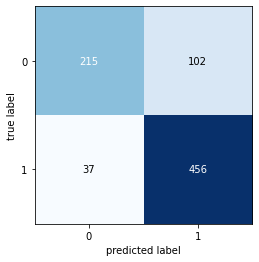

In [ ]:
#confusion matrix train
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm)
plt.show()


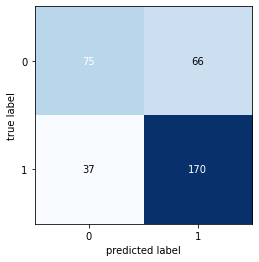

In [ ]:
# matrix de confución test
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
rf.feature_importances_

array([0.00441184, 0.02330473, 0.01425156, 0.01125164, 0.00830282,
       0.00093717, 0.00059969, 0.02046366, 0.000447  , 0.0064327 ,
       0.00156882, 0.01371   , 0.00044461, 0.00070513, 0.00688783,
       0.0353978 , 0.00141499, 0.00120771, 0.00590007, 0.00782325,
       0.01809159, 0.00160752, 0.00648462, 0.00413865, 0.00775314,
       0.01393838, 0.01346083, 0.00807911, 0.00724862, 0.01809947,
       0.00730163, 0.00105016, 0.01716247, 0.00797531, 0.01659543,
       0.03269747, 0.02827547, 0.129301  , 0.15963442, 0.16618621,
       0.16945547])

In [ ]:
x_train.columns

Index(['Curso_nuevo', 'Programa', 'NumCursos', 'NumCursosFac', 'Keywords_gt',
       'Valor_por_hora', 'Categoría', 'Facultad', 'Modalidad'],
      dtype='object')

In [ ]:
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels      = np.concatenate([encoded_cat, numeric_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Estudiamos la importancia train de las variables train en el RandomForest
importancia_rf_train=pd.DataFrame(rf.feature_importances_, index=labels , columns=['Importancia'])
importancia_rf_train

,Importancia
Categoría_ActualizaciÃ³n Profesional,0.004412
Categoría_Actualización Profesional,0.023305
"Categoría_Arte, Ciencias y Humanidades",0.014252
"Categoría_Artes, Ciencias y Humanidades",0.011252
Categoría_Bienestar - Desarrollo Personal,0.008303
Categoría_Corporativo,0.000937
Categoría_Cursos Libres de Posgrado,0.000600
Categoría_Desarrollo Personal,0.020464
Categoría_En Sede Caribe - Cartagena,0.000447
Categoría_Lenguas,0.006433


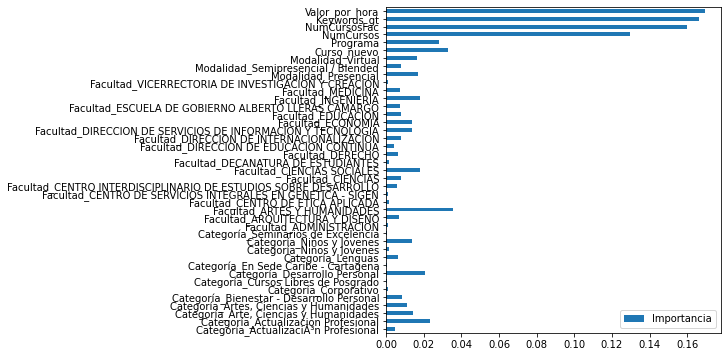

In [ ]:
# Visualización de la importancia train
importancia_rf_train.plot(kind='barh', figsize=(6,6))

### Visualizar Arbol 

[Text(0.8069620253164557, 0.9545454545454546, 'X[28] <= 0.5\nentropy = 1.0\nsamples = 512\nvalue = [413.943, 399.249]'),
 Text(0.7151898734177216, 0.8636363636363636, 'X[14] <= 0.5\nentropy = 1.0\nsamples = 505\nvalue = [399.89, 397.606]'),
 Text(0.6075949367088608, 0.7727272727272727, 'X[37] <= 279.5\nentropy = 1.0\nsamples = 476\nvalue = [387.114, 372.14]'),
 Text(0.5443037974683544, 0.6818181818181818, 'X[0] <= 0.5\nentropy = 0.999\nsamples = 466\nvalue = [387.114, 358.174]'),
 Text(0.4936708860759494, 0.5909090909090909, 'X[7] <= 0.5\nentropy = 0.998\nsamples = 459\nvalue = [385.836, 349.959]'),
 Text(0.46835443037974683, 0.5, 'X[40] <= 58062.5\nentropy = 0.994\nsamples = 443\nvalue = [385.836, 322.028]'),
 Text(0.3291139240506329, 0.4090909090909091, 'X[9] <= 0.5\nentropy = 0.964\nsamples = 253\nvalue = [259.353, 165.122]'),
 Text(0.20253164556962025, 0.3181818181818182, 'X[19] <= 0.5\nentropy = 0.969\nsamples = 244\nvalue = [247.855, 162.657]'),
 Text(0.10126582278481013, 0.22727

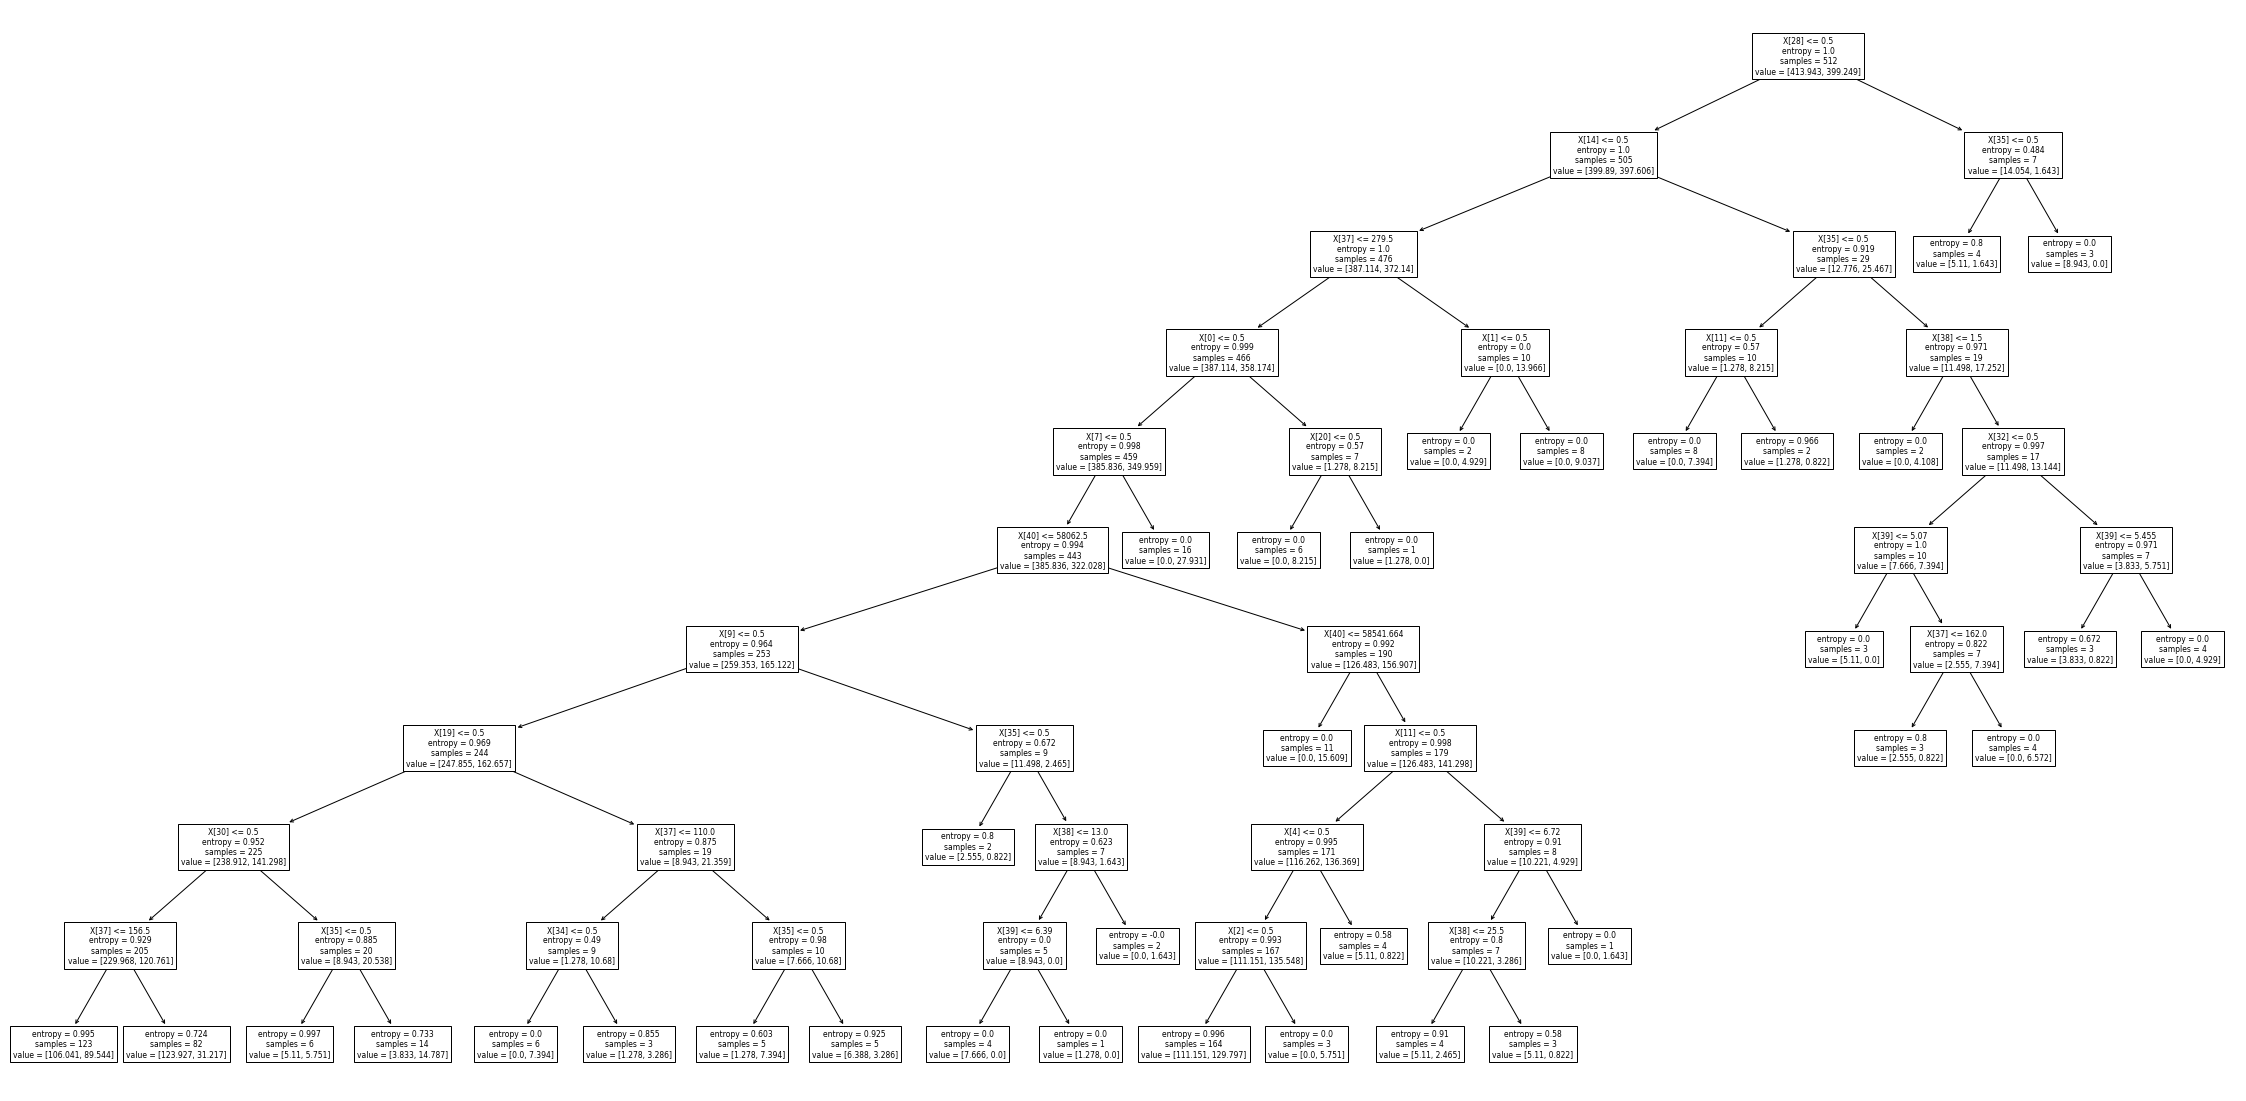

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(rf.estimators_[0])

# 6 Predicción

In [ ]:
# se carga la fuente de datos a predecir 
path = '/content/data_predecir.csv'
data_predecir_df = pd.read_csv(path, delimiter=';', encoding='utf-8')

In [ ]:
data_predecir_df

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad
0,CUR-0037800,Legal de M&A y transacciones corporativas,14/03/2022,1/01/2022,No,No,226,21,"Transacciones corporativas, Derecho, M&A, Lega...",68600.00,Actualización Profesional,DERECHO,Virtual
1,CUR-0037801,Derecho y migración: panorama del derecho migr...,24/02/2022,1/12/2021,No,No,276,23,"Derecho, migración, derecho migratorio, Colombia",60700.00,Actualización Profesional,DERECHO,Virtual
2,CUR-0037802,Gerencia y Desarrollo Integral de Proyectos de...,7/03/2022,1/01/2022,No,No,226,26,Programa Gerencia y Desarrollo Integral de Pro...,70000.00,Actualización Profesional,INGENIERIA,Virtual
3,CUR-0037803,Programa Profesionales® Régimen de Insolvencia,14/02/2022,1/12/2021,No,No,276,23,"Derecho, Régimen, Insolvencia",58518.18,Actualización Profesional,DERECHO,Virtual
4,CUR-0037805,Usos medicinales del cannabis,28/03/2022,1/01/2022,No,No,226,26,"Usos medicinales, cannabis, cannabis para la s...",76666.67,Actualización Profesional,INGENIERIA,Virtual
5,CUR-0037807,Lean Six Sigma Black Belt,9/08/2022,1/06/2022,No,No,158,20,"ingeniería, Lean Six Sigma Black Belt",80000.00,Actualización Profesional,INGENIERIA,Virtual
6,CUR-0037808,Preparación para TOEFL y IELTS,5/04/2022,1/02/2022,No,No,191,58,"Preparación para TOEFL y IELTS, exámenes inglés",47347.22,Lenguas,CIENCIAS SOCIALES,Virtual
7,CUR-0037809,Imperios en la historia de la humanidad,19/03/2022,1/01/2022,Si,No,226,69,"imperios de la humanidad, cursos de historia, ...",41250.00,"Arte, Ciencias y Humanidades",CIENCIAS SOCIALES,Virtual
8,CUR-0037810,Inversión de Impacto: Contexto Latinoamericano,22/03/2022,1/01/2022,Si,No,226,0,"Inversiones, Inversión, Latinoamérica",78125.00,Actualización Profesional,VICERRECTORIA DE INVESTIGACION Y CREACION,Virtual
9,CUR-0037812,Retos y herramientas para la intervención soci...,1/03/2022,1/01/2022,No,Si,226,69,"intervención social, programas sociales, soste...",50892.86,Actualización Profesional,CIENCIAS SOCIALES,Virtual


### 2.3 trasnfromacion de variables y manejo de null

In [ ]:
# # Transformaciones a variables de la base 
data_predecir_df['Curso_nuevo'] = data_predecir_df['Curso_nuevo'].replace({'Si':1, 'No':0})
data_predecir_df['Programa'] = data_predecir_df['Programa'].replace({'Si':1, 'No':0})

In [ ]:
# Transformar formato de las fechas  
data_predecir_df['Fecha_creación'] =  pd.to_datetime(data_predecir_df['Fecha_creación'], format='%d/%m/%Y')
data_predecir_df['Fecha_inicio']   =  pd.to_datetime(data_predecir_df['Fecha_inicio']  , format='%d/%m/%Y')

In [ ]:
#Agregar ventanas de tiempo
data_predecir_df['Fecha_busqueda'] =  data_predecir_df['Fecha_creación'] + pd.Timedelta('-1 days')
data_predecir_df['Fecha_ventana']  =  data_predecir_df['Fecha_creación'] + pd.Timedelta('-180 days')

In [ ]:
# Busqueda kerword para datos a predecir 
# Limpieza cache spark
spark.catalog.clearCache()

In [ ]:
data_modelo_df = spark.createDataFrame(data_predecir_df)

In [ ]:
#Separación de keywords
data_modelo_df = data_modelo_df.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.split(F.col('Keywords'), ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [ ]:
df_rows = data_modelo_df.collect()

In [ ]:
data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.lit(0))
for row in df_rows:
  keywords = get_google_trend(row['Keywords'], row['Fecha_busqueda'], row['Fecha_creación'])
  data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.when(F.col('Consectutivo_curso') == row['Consectutivo_curso'], keywords).otherwise(F.col('Keywords_gt')))


Fecja inicio: 2021-12-31  Fecha Fin: 2022-01-01  Keywords: ['transacciones corporativas', 'derecho', 'm&a', 'legal', 'banca de inversión'] media:  28.9
Error: The request failed: Google returned a response with code 429
Error: "['isPartial'] not found in axis"
Fecja inicio: 2021-11-30  Fecha Fin: 2021-12-01  Keywords: ['derecho', 'régimen', 'insolvencia'] media:  39.333333333333336
Fecja inicio: 2021-12-31  Fecha Fin: 2022-01-01  Keywords: ['usos medicinales', 'cannabis', 'cannabis para la salud.'] media:  28.0
Fecja inicio: 2022-05-31  Fecha Fin: 2022-06-01  Keywords: ['ingeniería', 'lean six sigma black belt'] media:  25.0
Error: "['isPartial'] not found in axis"
Error: The request failed: Google returned a response with code 429
Fecja inicio: 2021-12-31  Fecha Fin: 2022-01-01  Keywords: ['inversiones', 'inversión', 'latinoamérica'] media:  16.666666666666668
Error: The request failed: Google returned a response with code 429


In [ ]:
data_modelo_df

DataFrame[Consectutivo_curso: string, Nombre: string, Fecha_inicio: timestamp, Fecha_creación: timestamp, Curso_nuevo: bigint, Programa: bigint, NumCursos: bigint, NumCursosFac: bigint, Keywords: array<string>, Valor_por_hora: double, Categoría: string, Facultad: string, Modalidad: string, Fecha_busqueda: timestamp, Fecha_ventana: timestamp, Keywords_gt: double]

In [ ]:
# se cambia el dataframe a pandas 
data_modelo_df = data_modelo_df.toPandas()


In [ ]:
# copia dataframe para seleccionar columnas predicción
data_modelo_predictions = pd.DataFrame(data_modelo_df.loc[:, ['Consectutivo_curso','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords_gt','Valor_por_hora','Categoría', 'Facultad', 'Modalidad']])

In [ ]:
data_modelo_predictions

,Consectutivo_curso,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad
0,CUR-0037800,0,0,226,21,28.90,68600.00,Actualización Profesional,DERECHO,Virtual
1,CUR-0037801,0,0,276,23,0.00,60700.00,Actualización Profesional,DERECHO,Virtual
2,CUR-0037802,0,0,226,26,0.00,70000.00,Actualización Profesional,INGENIERIA,Virtual
3,CUR-0037803,0,0,276,23,39.33,58518.18,Actualización Profesional,DERECHO,Virtual
4,CUR-0037805,0,0,226,26,28.00,76666.67,Actualización Profesional,INGENIERIA,Virtual
5,CUR-0037807,0,0,158,20,25.00,80000.00,Actualización Profesional,INGENIERIA,Virtual
6,CUR-0037808,0,0,191,58,0.00,47347.22,Lenguas,CIENCIAS SOCIALES,Virtual
7,CUR-0037809,1,0,226,69,0.00,41250.00,"Arte, Ciencias y Humanidades",CIENCIAS SOCIALES,Virtual
8,CUR-0037810,1,0,226,0,16.67,78125.00,Actualización Profesional,VICERRECTORIA DE INVESTIGACION Y CREACION,Virtual
9,CUR-0037812,0,1,226,69,0.00,50892.86,Actualización Profesional,CIENCIAS SOCIALES,Virtual


In [ ]:
data_modelo_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Consectutivo_curso  10 non-null     object 
 1   Curso_nuevo         10 non-null     int64  
 2   Programa            10 non-null     int64  
 3   NumCursos           10 non-null     int64  
 4   NumCursosFac        10 non-null     int64  
 5   Keywords_gt         10 non-null     float64
 6   Valor_por_hora      10 non-null     float64
 7   Categoría           10 non-null     object 
 8   Facultad            10 non-null     object 
 9   Modalidad           10 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 928.0+ bytes


In [ ]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo_predictions[['Categoría', 'Facultad', 'Modalidad']] = data_modelo_predictions[['Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [ ]:
data_modelo_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Consectutivo_curso  10 non-null     object  
 1   Curso_nuevo         10 non-null     int64   
 2   Programa            10 non-null     int64   
 3   NumCursos           10 non-null     int64   
 4   NumCursosFac        10 non-null     int64   
 5   Keywords_gt         10 non-null     float64 
 6   Valor_por_hora      10 non-null     float64 
 7   Categoría           10 non-null     category
 8   Facultad            10 non-null     category
 9   Modalidad           10 non-null     category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 1.1+ KB


In [ ]:
data_modelo_predictions_prep = data_modelo_predictions.loc[:, ['Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords_gt','Valor_por_hora','Categoría', 'Facultad', 'Modalidad']]
data_modelo_predictions_prep 

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad
0,0,0,226,21,28.90,68600.00,Actualización Profesional,DERECHO,Virtual
1,0,0,276,23,0.00,60700.00,Actualización Profesional,DERECHO,Virtual
2,0,0,226,26,0.00,70000.00,Actualización Profesional,INGENIERIA,Virtual
3,0,0,276,23,39.33,58518.18,Actualización Profesional,DERECHO,Virtual
4,0,0,226,26,28.00,76666.67,Actualización Profesional,INGENIERIA,Virtual
5,0,0,158,20,25.00,80000.00,Actualización Profesional,INGENIERIA,Virtual
6,0,0,191,58,0.00,47347.22,Lenguas,CIENCIAS SOCIALES,Virtual
7,1,0,226,69,0.00,41250.00,"Arte, Ciencias y Humanidades",CIENCIAS SOCIALES,Virtual
8,1,0,226,0,16.67,78125.00,Actualización Profesional,VICERRECTORIA DE INVESTIGACION Y CREACION,Virtual
9,0,1,226,69,0.00,50892.86,Actualización Profesional,CIENCIAS SOCIALES,Virtual


In [ ]:
# predictions on test set
y_predict = pipe.predict(data_modelo_predictions_prep)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
predictions = pipe.predict_proba(data_modelo_predictions_prep)

In [ ]:
predictions

array([[0.37093965, 0.62906035],
       [0.55826611, 0.44173389],
       [0.27956518, 0.72043482],
       [0.59943072, 0.40056928],
       [0.27237583, 0.72762417],
       [0.38079891, 0.61920109],
       [0.62397161, 0.37602839],
       [0.70814625, 0.29185375],
       [0.2888266 , 0.7111734 ],
       [0.64964382, 0.35035618]])

In [ ]:
data_modelo_predictions_prep['probability']          = pipe.predict(data_modelo_predictions_prep)
data_modelo_predictions_prep['probability_No_exito'] = predictions[:, 0]
data_modelo_predictions_prep['probability_Exito']    = predictions[:, 1]
data_modelo_predictions_prep['Consectutivo_curso']   = data_modelo_predictions['Consectutivo_curso']

In [ ]:
data_modelo_predictions_prep

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad,probability,probability_No_exito,probability_Exito,Consectutivo_curso
0,0,0,226,21,28.90,68600.00,Actualización Profesional,DERECHO,Virtual,1,0.370940,0.629060,CUR-0037800
1,0,0,276,23,0.00,60700.00,Actualización Profesional,DERECHO,Virtual,0,0.558266,0.441734,CUR-0037801
2,0,0,226,26,0.00,70000.00,Actualización Profesional,INGENIERIA,Virtual,1,0.279565,0.720435,CUR-0037802
3,0,0,276,23,39.33,58518.18,Actualización Profesional,DERECHO,Virtual,0,0.599431,0.400569,CUR-0037803
4,0,0,226,26,28.00,76666.67,Actualización Profesional,INGENIERIA,Virtual,1,0.272376,0.727624,CUR-0037805
5,0,0,158,20,25.00,80000.00,Actualización Profesional,INGENIERIA,Virtual,1,0.380799,0.619201,CUR-0037807
6,0,0,191,58,0.00,47347.22,Lenguas,CIENCIAS SOCIALES,Virtual,0,0.623972,0.376028,CUR-0037808
7,1,0,226,69,0.00,41250.00,"Arte, Ciencias y Humanidades",CIENCIAS SOCIALES,Virtual,0,0.708146,0.291854,CUR-0037809
8,1,0,226,0,16.67,78125.00,Actualización Profesional,VICERRECTORIA DE INVESTIGACION Y CREACION,Virtual,1,0.288827,0.711173,CUR-0037810
9,0,1,226,69,0.00,50892.86,Actualización Profesional,CIENCIAS SOCIALES,Virtual,0,0.649644,0.350356,CUR-0037812


In [ ]:
data_modelo_predictions_prep.to_csv('/content/data_modelo_predictions_prep.csv', sep =';', index= False)

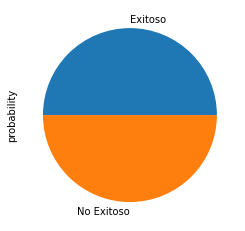

In [ ]:
# visaulizamos  el % de cuross exitos y no exitos 
data_modelo_predictions_prep['probability'].value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'}).plot.pie()

In [ ]:
# imprimme  el % de cuross exitos y no exitos 
data_modelo_predictions_prep.probability.value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'})

Exitoso       0.5
No Exitoso    0.5
Name: probability, dtype: float64

In [ ]:
data_modelo_predictions_prep.iloc[2]


In [ ]:
data_modelo_df.iloc[2]